# Summary Statistics
In these exercises you'll use a real life medical dataset to learn how to obtain basic statistics from the data. This dataset comes from [Gluegrant](https://www.gluegrant.org/), an American project that aims to find a which genes are more important for the recovery of severely injured patients! 

## Dataset information

The dataset is a medical dataset with 184 patients, distributed into 2 test groups where each group divided in 2, patients and control.
The dataset is composed of clinical values:
* Patient.id
* Age
* Sex
* Group (to what group they belong)
* *And __~55k genes__*

### Import Data

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

CSS = """
.output {
    flex-direction: row;
}
"""

complete_data = pd.read_csv("./Complete_Example_Data.csv")
complete_data = complete_data.set_index('Patient_id')

The dimensions of the dataset are

In [2]:
complete_data.shape

(184, 54678)

Let's take a look:

In [3]:
complete_data.iloc[:, 0:15].head()

,Group,Age,Sex,X1007_s_at,X1053_at,X117_at,X121_at,X1255_g_at,X1294_at,X1316_at,X1320_at,X1405_i_at,X1431_at,X1438_at,X1487_at
Patient_id,,,,,,,,,,,,,,,
1,Control,20,male,275.954,103.938,1255.421,283.076,35.397,448.069,189.946,56.747,5078.741,29.986,63.090,288.131
2,Control,34,female,292.398,110.588,1206.195,268.708,35.450,489.481,178.548,53.771,5277.114,36.069,56.981,301.281
3,Control,40,female,290.127,97.707,1006.427,286.121,39.786,517.802,197.514,51.881,4455.763,32.984,56.121,340.501
4,Control,31,male,342.869,120.108,1298.632,328.592,33.509,471.789,202.819,61.745,2596.474,26.153,57.782,330.696
5,Control,21,female,261.681,113.396,1470.422,211.099,35.842,486.101,178.746,66.644,4677.845,30.130,61.144,265.389


### For those without biological background

You can consider that this dataset comes from a online shopping service like Amazon. Imagine that they were conducting an A/B test, where a small part of their website was changed, like the related items suggestions. You have 2 groups, the "control group" that is the group that is experiencing the original website (without modifications) and Group 1 that is using the website with the new suggestions.

Consider also that the genes are products or product categories where the customers buy a certain ammount of products. Your objective now is to find if there is a significant difference between the __control group__ and __Group 1__.

### Data normalization

Considering that we have multiple patients and that for each of them a blood sample will be collected, from where the Gene values are obtained, some patients will have higher values of the genes than others. To make the analysis significant, we should first normalize every patient's values! (This was already done for this dataset, I will only show you the values)

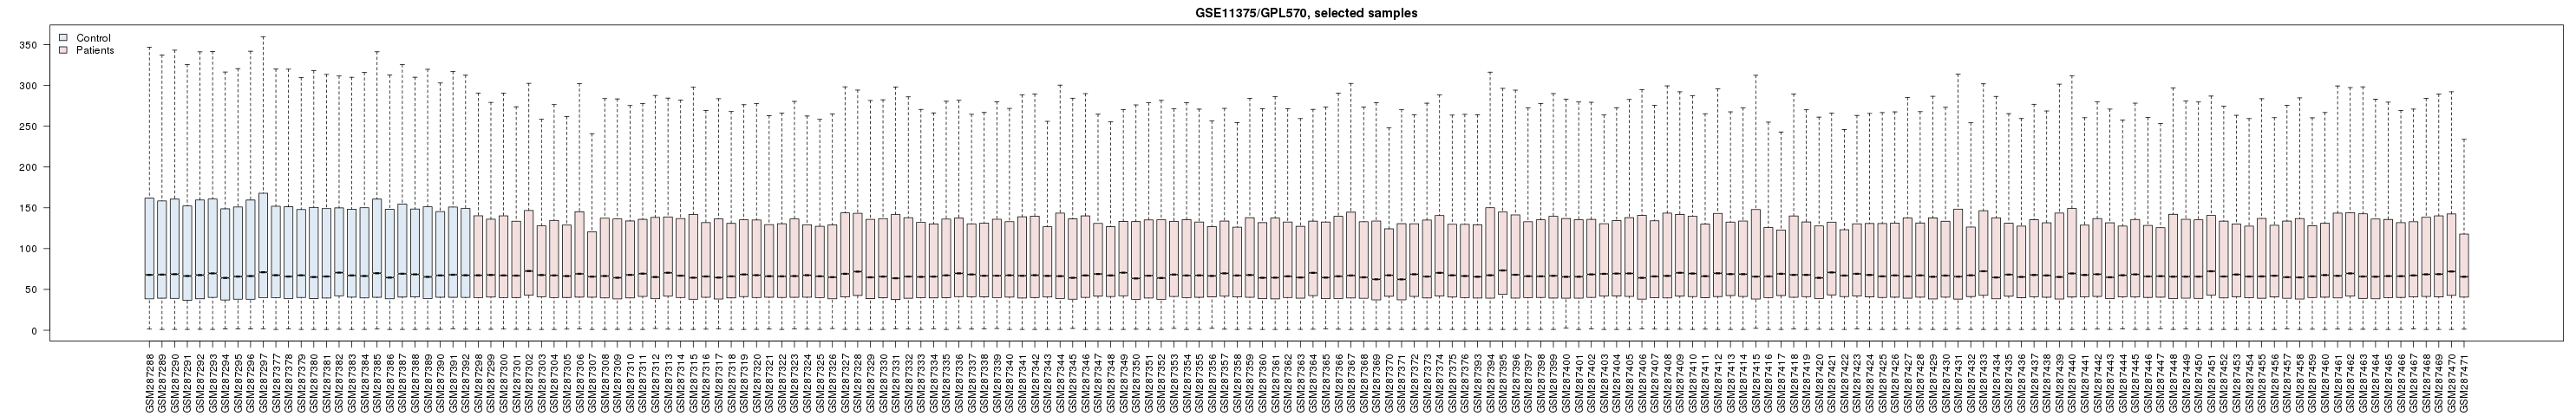

In [7]:
from IPython.core.display import Image, display
display(Image('./untitled.png', width=2000, unconfined=True))

Now that the data has been normalized, we can proceed with the analysis.

## Analysis to perform
* Basic statistics on the differences between patients of differnet sexes.
* Check what happened to the patients.
* Check which genes are more or less expressed in the patients.

### Age statistics for each of the sexes

In [11]:
male_patients = complete_data[complete_data.Sex == "male"]
female_patients =  complete_data[complete_data.Sex == "female"]

# Mean
male_mean_age = male_patients.Age.mean()
female_mean_age = female_patients.Age.mean()

# Median
male_median_age = male_patients.Age.median()
female_median_age = female_patients.Age.median()

# Std
male_std_age = male_patients.Age.std()
female_std_age = female_patients.Age.std()

print("The male mean age is:", male_mean_age, "The median age is:", male_median_age, \
      "and the standard dev is:", male_std_age)
print("The female mean age is:", female_mean_age, "The median age is:", female_median_age, \
      "and the standard dev is:", female_std_age)

The male mean age is: 32.95652173913044 The median age is: 32.0 and the standard dev is: 11.174368622493418
The female mean age is: 33.3768115942029 The median age is: 33.0 and the standard dev is: 11.014831510921137


There is almost no difference from the sexes! Really strange to see such close numbers...

### Check out what happened to the patients

We have a column named _Results_ that 